# Unsharp Masking Implementation
## Image Enhancement Using High-Pass Filtering Technique

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [16]:
!curl -o unsharp_input_image.jpg https://raw.githubusercontent.com/opencv/opencv/master/samples/data/building.jpg

def unsharp_show_image(unsharp_img_array, unsharp_title="Image"):
    plt.figure(figsize=(6, 6))
    if len(unsharp_img_array.shape) == 2:
        plt.imshow(unsharp_img_array, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(unsharp_img_array, cv2.COLOR_BGR2RGB))
    plt.title(unsharp_title)
    plt.axis('off')
    plt.show()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 79718  100 79718    0     0   562k      0 --:--:-- --:--:-- --:--:--  564k


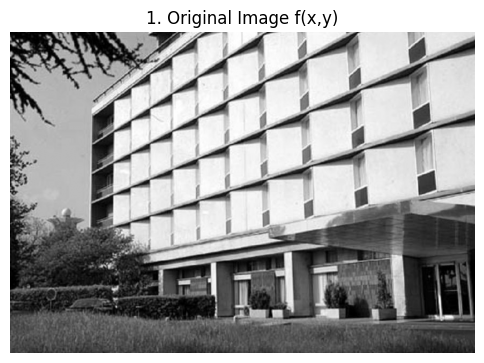

In [17]:
unsharp_img_loaded = cv2.imread('unsharp_input_image.jpg', cv2.IMREAD_GRAYSCALE)

if unsharp_img_loaded is None:
    print("Error: Image not loaded.")
else:
    unsharp_original_fxy = unsharp_img_loaded.astype(np.float32)
    unsharp_show_image(unsharp_original_fxy.astype(np.uint8), "1. Original Image f(x,y)")


Original image $f(x,y)$ with both low-frequency (smooth areas) and high-frequency components (edges, textures).

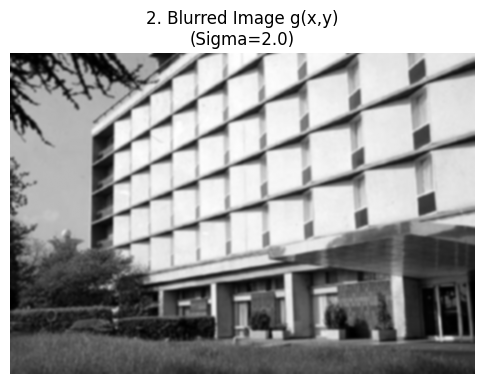

In [18]:
unsharp_kernel_size = (9, 9)
unsharp_sigma_value = 2.0

unsharp_blurred_gxy = cv2.GaussianBlur(unsharp_original_fxy, unsharp_kernel_size, unsharp_sigma_value)
unsharp_show_image(unsharp_blurred_gxy.astype(np.uint8), f"2. Blurred Image g(x,y)\n(Sigma={unsharp_sigma_value})")


Blurred image $g(x,y)$ after Gaussian blur. High-frequency details (textures, edges) are removed, leaving only low-frequency components (smooth shapes).

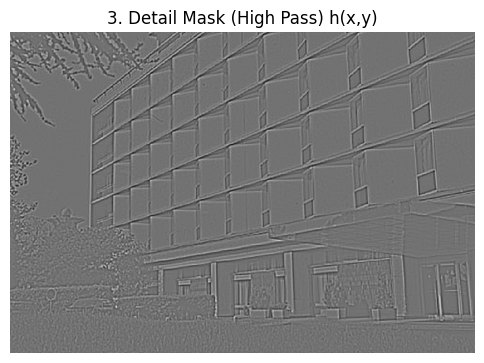

In [19]:
unsharp_detail_mask_hxy = unsharp_original_fxy - unsharp_blurred_gxy
unsharp_mask_display = cv2.normalize(unsharp_detail_mask_hxy, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
unsharp_show_image(unsharp_mask_display.astype(np.uint8), "3. Detail Mask (High Pass) h(x,y)")


Detail mask $h(x,y) = f(x,y) - g(x,y)$ showing the high-frequency components extracted from the original. The ghostly outlines represent what was removed during blurring.

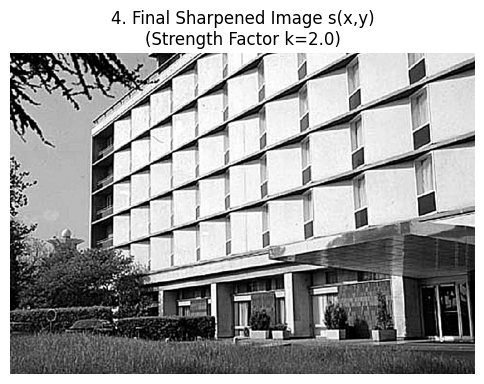

In [20]:
unsharp_strength_factor_k = 2.0
unsharp_final_sxy = unsharp_original_fxy + (unsharp_strength_factor_k * unsharp_detail_mask_hxy)
unsharp_final_sxy = np.clip(unsharp_final_sxy, 0, 255)
unsharp_show_image(unsharp_final_sxy.astype(np.uint8), f"4. Final Sharpened Image s(x,y)\n(Strength Factor k={unsharp_strength_factor_k})")


Final sharpened image $s(x,y) = f(x,y) + (k \times h(x,y))$. The amplified details make textures more pronounced and edges sharper. With $k=2.0$, slight halos may appear around edges.

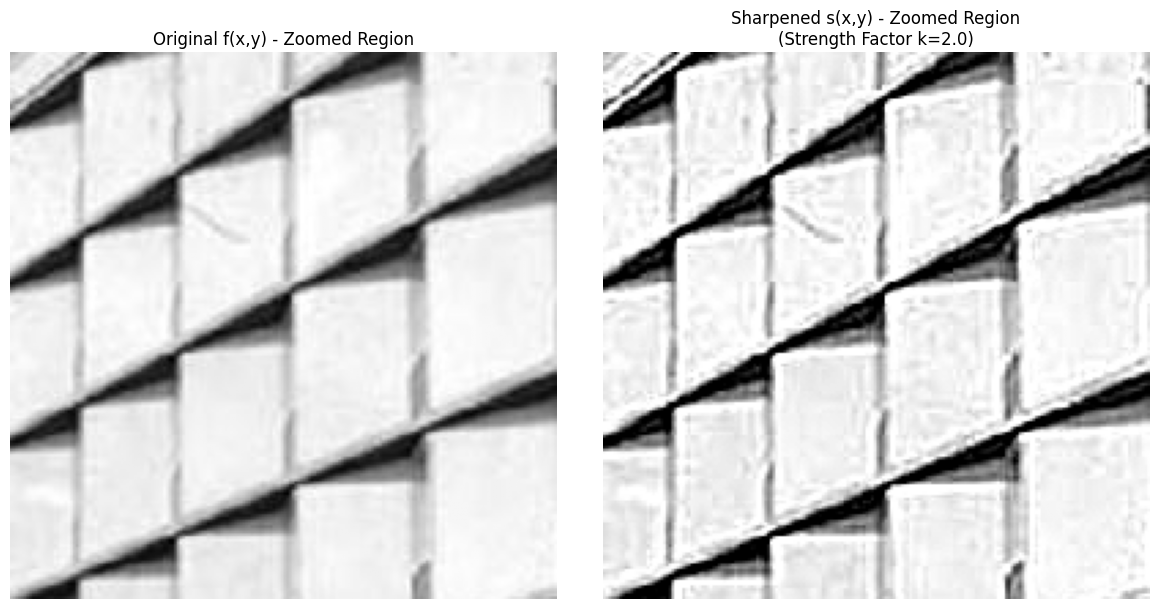

In [21]:
unsharp_crop_y1, unsharp_crop_y2 = 100, 300
unsharp_crop_x1, unsharp_crop_x2 = 200, 400

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original f(x,y) - Zoomed Region")
plt.imshow(unsharp_original_fxy.astype(np.uint8)[unsharp_crop_y1:unsharp_crop_y2, unsharp_crop_x1:unsharp_crop_x2], cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Sharpened s(x,y) - Zoomed Region\n(Strength Factor k={unsharp_strength_factor_k})")
plt.imshow(unsharp_final_sxy.astype(np.uint8)[unsharp_crop_y1:unsharp_crop_y2, unsharp_crop_x1:unsharp_crop_x2], cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Side-by-side comparison of a zoomed region (rows 100-300, columns 200-400) showing the original vs. sharpened image. The sharpened version shows enhanced edge contrast (acutance) with steeper transitions between dark and light pixels, making textures appear crisper. Note that the high-pass filter may also amplify some noise along with the edges, which is a trade-off inherent to the unsharp masking technique.